**c] Mask R-CNN for Instance Segmentation**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
net = cv2.dnn.readNetFromTensorflow(
    '/kaggle/input/dataset/frozen_inference_graph.pb',
    '/kaggle/input/dataset/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt'
)

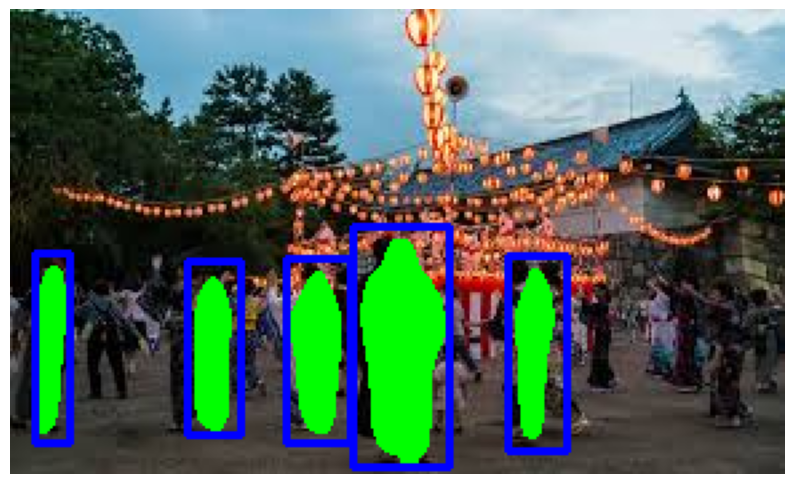

In [6]:
img = cv2.imread('/kaggle/input/week3img/images.jfif')
height, width, _ = img.shape

# Step 4: Prepare the Image for Mask R-CNN
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)
net.setInput(blob)

# Step 5: Forward Pass through Mask R-CNN
boxes, masks = net.forward(['detection_out_final', 'detection_masks'])

# Step 6: Process the Output
detection_count = boxes.shape[2]
for i in range(detection_count):
    box = boxes[0, 0, i]
    class_id = int(box[1])
    score = box[2]
   
    if score > 0.5:
        x = int(box[3] * width)
        y = int(box[4] * height)
        x2 = int(box[5] * width)
        y2 = int(box[6] * height)
        roi = img[y:y2, x:x2]
        roi_height, roi_width = roi.shape[:2]
       
        mask = masks[i, class_id]
        mask = cv2.resize(mask, (roi_width, roi_height))
        mask = mask > 0.5
       
        roi[mask] = [0, 255, 0]
        img[y:y2, x:x2] = roi
       
        cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 2)

# Step 7: Display the Output with matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()